In [1]:
import pandas as pd

In [2]:
games = pd.read_csv("/home/niraj/Downloads/games.csv")


In [32]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [3]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [4]:
print(games.shape)

(81312, 20)


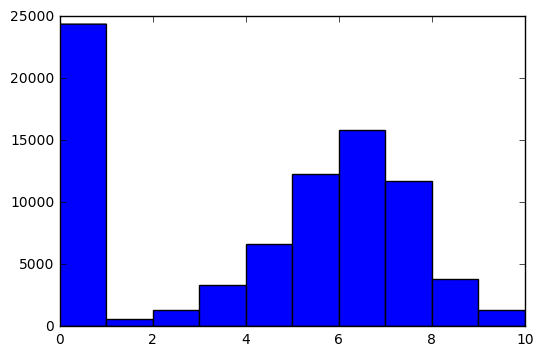

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(games['average_rating'])

plt.show()

In [6]:
print(games[games['average_rating']==0].iloc[0])
print(games[games['average_rating']>0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

In [8]:
games=games[games['users_rated']>0]

In [10]:
games=games.dropna(axis=0)

In [12]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5,random_state=1)

good_columns=games._get_numeric_data()

kmeans_model.fit(good_columns)

labels =kmeans_model.labels_

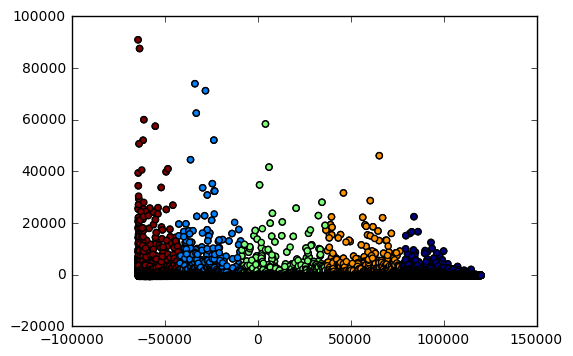

In [15]:
from sklearn.decomposition import PCA

pca_2 = PCA(2)

plot_columns=pca_2.fit_transform(good_columns)

plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1],c=labels)

plt.show()

In [17]:
games.corr()['average_rating']

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [18]:
columns = games.columns.tolist()

columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name"]]

target = "average_rating"

In [19]:
from sklearn.cross_validation import train_test_split

train = games.sample(frac=0.8,random_state=1)

test = games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(train[columns],train[target])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(test[columns])

mean_squared_error(predictions,test[target])

1.8239281903519868

In [22]:
from sklearn.ensemble import  RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)

model.fit(train[columns],train[target])

predictions = model.predict(test[columns])

mean_squared_error(predictions,test[target])

1.4144642407044481

In [24]:
###Further exploration

from sklearn.svm import LinearSVR

model = LinearSVR()
model.fit(train[columns],train[target])

predictions = model.predict(test[columns])

mean_squared_error(predictions,test[target])

5.2175918013603777

In [25]:
##predicting another feature
games.corr()['average_weight']

id                     -0.082301
yearpublished           0.125318
minplayers             -0.021892
maxplayers             -0.013448
playingtime             0.090895
minplaytime             0.084405
maxplaytime             0.090895
minage                  0.259782
users_rated             0.150597
average_rating          0.351081
bayes_average_rating    0.482356
total_owners            0.183341
total_traders           0.227302
total_wanters           0.254229
total_wishers           0.219025
total_comments          0.180939
total_weights           0.161004
average_weight          1.000000
Name: average_weight, dtype: float64

In [26]:
columns = games.columns.tolist()

columns = [c for c in columns if c not in ["average_weight","type","name"]]

target = "average_weight"

In [27]:
from sklearn.cross_validation import train_test_split

train,test=train_test_split(games,test_size=0.2,random_state=1)

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [28]:

model = LinearRegression()

model.fit(train[columns],train[target])

predictions = model.predict(test[columns])

mean_squared_error(predictions,test[target])


1.0029042086911082

In [29]:
model = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)

model.fit(train[columns],train[target])

predictions = model.predict(test[columns])

mean_squared_error(predictions,test[target])

0.22538650984908362

In [30]:
from sklearn.svm import LinearSVR

model = LinearSVR()
model.fit(train[columns],train[target])

predictions = model.predict(test[columns])

mean_squared_error(predictions,test[target])

48.141013277262815

In [38]:
#New Feature
games['NameLength'] = games['name'].str.len()



In [39]:
games['NameLength']

0        17
1        13
2        25
3        41
4        11
5         8
6        18
7        22
8        23
9         7
10       10
11       27
12       32
13       48
14        8
15        5
16       28
17       33
18        9
19        6
20        9
21       18
22       16
23       19
24       33
25        9
26       15
27       18
28       20
29       33
         ..
81134    15
81160    36
81162    14
81176    37
81177    38
81178    39
81179    28
81180    38
81181    23
81184    37
81188     6
81190    26
81192    61
81193    64
81195    30
81198    13
81199    11
81204    38
81234    11
81249    27
81254    38
81255    48
81256    48
81257    44
81258    38
81260    31
81261    27
81263    32
81278    12
81279    14
Name: NameLength, dtype: int64

In [40]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56894 entries, 0 to 81279
Data columns (total 21 columns):
id                      56894 non-null int64
type                    56894 non-null object
name                    56894 non-null object
yearpublished           56894 non-null float64
minplayers              56894 non-null float64
maxplayers              56894 non-null float64
playingtime             56894 non-null float64
minplaytime             56894 non-null float64
maxplaytime             56894 non-null float64
minage                  56894 non-null float64
users_rated             56894 non-null int64
average_rating          56894 non-null float64
bayes_average_rating    56894 non-null float64
total_owners            56894 non-null int64
total_traders           56894 non-null int64
total_wanters           56894 non-null int64
total_wishers           56894 non-null int64
total_comments          56894 non-null int64
total_weights           56894 non-null int64
average_weight  

In [41]:
games.corr()['average_rating']

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
NameLength              0.189372
Name: average_rating, dtype: float64

In [42]:
columns = games.columns.tolist()

columns = [c for c in columns if c not in ["average_weight","type","name"]]

target = "average_weight"

In [43]:
from sklearn.cross_validation import train_test_split

train,test=train_test_split(games,test_size=0.2,random_state=1)

print(train.shape)
print(test.shape)

(45515, 21)
(11379, 21)


In [44]:
model = LinearRegression()

model.fit(train[columns],train[target])

predictions = model.predict(test[columns])

mean_squared_error(predictions,test[target])

1.0044244369415902

In [45]:
model = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)

model.fit(train[columns],train[target])

predictions = model.predict(test[columns])

mean_squared_error(predictions,test[target])

0.22493650818716779

In [46]:
model = LinearSVR()
model.fit(train[columns],train[target])

predictions = model.predict(test[columns])

mean_squared_error(predictions,test[target])

2.8580334739972568

In [47]:
columns = games.columns.tolist()

columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name"]]

target = "average_rating"

In [48]:
model = LinearRegression()

model.fit(train[columns],train[target])

predictions = model.predict(test[columns])

mean_squared_error(predictions,test[target])

1.8216080633830969

In [49]:
model = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)

model.fit(train[columns],train[target])

predictions = model.predict(test[columns])

mean_squared_error(predictions,test[target])

1.3994288407358446

In [50]:
model = LinearSVR()
model.fit(train[columns],train[target])

predictions = model.predict(test[columns])

mean_squared_error(predictions,test[target])

6.8720703126152634